# Show types of tasks supported by pipeline

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

print(type(SUPPORTED_TASKS))

/home/ubuntu/MyFiles/GitHub/demos/transformers/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'dict'>


In [2]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v['type'])

audio-classification audio
automatic-speech-recognition multimodal
text-to-audio text
feature-extraction multimodal
text-classification text
token-classification text
question-answering text
table-question-answering text
visual-question-answering multimodal
document-question-answering multimodal
fill-mask text
summarization text
translation text
text2text-generation text
text-generation text
zero-shot-classification text
zero-shot-image-classification multimodal
zero-shot-audio-classification multimodal
image-classification image
image-feature-extraction image
image-segmentation multimodal
image-to-text multimodal
image-text-to-text multimodal
object-detection multimodal
zero-shot-object-detection multimodal
depth-estimation image
video-classification video
mask-generation multimodal
image-to-image image


# Pipeline's creating and usage

In [3]:
%env ALL_PROXY=http://127.0.0.1:7890
%env HTTP_PROXY=http://127.0.0.1:7890
%env HTTPS_PROXY=http://127.0.0.1:7890

env: ALL_PROXY=http://127.0.0.1:7890
env: HTTP_PROXY=http://127.0.0.1:7890
env: HTTPS_PROXY=http://127.0.0.1:7890


In [4]:
!curl 'https://huggingface.co'

<!doctype html>
<html class="">
	<head>
		<meta charset="utf-8" />
		<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no" />
		<meta name="description" content="We’re on a journey to advance and democratize artificial intelligence through open source and open science." />
		<meta property="fb:app_id" content="1321688464574422" />
		<meta name="twitter:card" content="summary_large_image" />
		<meta name="twitter:site" content="@huggingface" />
		<meta name="twitter:image" content="https://huggingface.co/front/thumbnails/v2-2.png" />
		<meta property="og:title" content="Hugging Face – The AI community building the future." />
		<meta property="og:type" content="website" />
		<meta property="og:url" content="https://huggingface.co/" />
		<meta property="og:image" content="https://huggingface.co/front/thumbnails/v2-2.png" />

		<link rel="stylesheet" href="/front/build/kube-41c4082/style.css" />

		<link rel="preconnect" href="https://fonts.gstatic.com" /

In [5]:
%env HF_HUB_CACHE=./data/hf_cache

env: HF_HUB_CACHE=./data/hf_cache


In [6]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer

## Only order the type of task

In [7]:
pipe = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [8]:
pipe("Very good!")

[{'label': 'POSITIVE', 'score': 0.9998525381088257}]

In [9]:
pipe("Fuck you!")

[{'label': 'NEGATIVE', 'score': 0.9919419288635254}]

## Order the type of task and model

In [10]:
pipe = pipeline('text-classification', model="Johnson8187/Chinese-Emotion")

Device set to use cuda:0


In [11]:
pipe("我觉得很好啊")

[{'label': 'LABEL_0', 'score': 0.8237548470497131}]

In [12]:
pipe("垃圾")

[{'label': 'LABEL_7', 'score': 0.5819162130355835}]

In [13]:
pipe.model.device

device(type='cuda', index=0)

## pre-load model, then create pipeline

In [14]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

pipe = pipeline('text-classification', model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [15]:
pipe('happy!')

[{'label': 'POSITIVE', 'score': 0.9998652935028076}]

In [16]:
pipe.model.device

device(type='cuda', index=0)

## CPU vs. GPU

In [17]:
cpu_pipe = pipeline('text-classification', model='Johnson8187/Chinese-Emotion', device='cpu')
gpu_pipe = pipeline('text-classification', model='Johnson8187/Chinese-Emotion', device='cuda:0')

Device set to use cpu
Device set to use cuda:0


In [18]:
%%time
for _ in range(100):
    cpu_pipe('味真足！味真足！')

CPU times: user 1min 31s, sys: 194 ms, total: 1min 31s
Wall time: 9.19 s


In [19]:
%%time
for _ in range(100):
    gpu_pipe('味真足！味真足！')

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


CPU times: user 1.3 s, sys: 57 μs, total: 1.3 s
Wall time: 1.3 s


## To realize the parameters of pipeline

In [20]:
qa_pipe = pipeline('question-answering', model='uer/roberta-base-chinese-extractive-qa')

Device set to use cuda:0


In [21]:
qa_pipe

In [22]:
from transformers.pipelines.question_answering import QuestionAnsweringPipeline # <-- Ctrl + Click here, see source code

In [23]:
qa_pipe(question="中国首都是哪里？", context="中国首都是百京！")

{'score': 0.5218293070793152, 'start': 5, 'end': 7, 'answer': '百京'}

# Other pipeline examples

In [24]:
obj_detector = pipeline('zero-shot-object-detection', model='google/owlvit-base-patch32')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


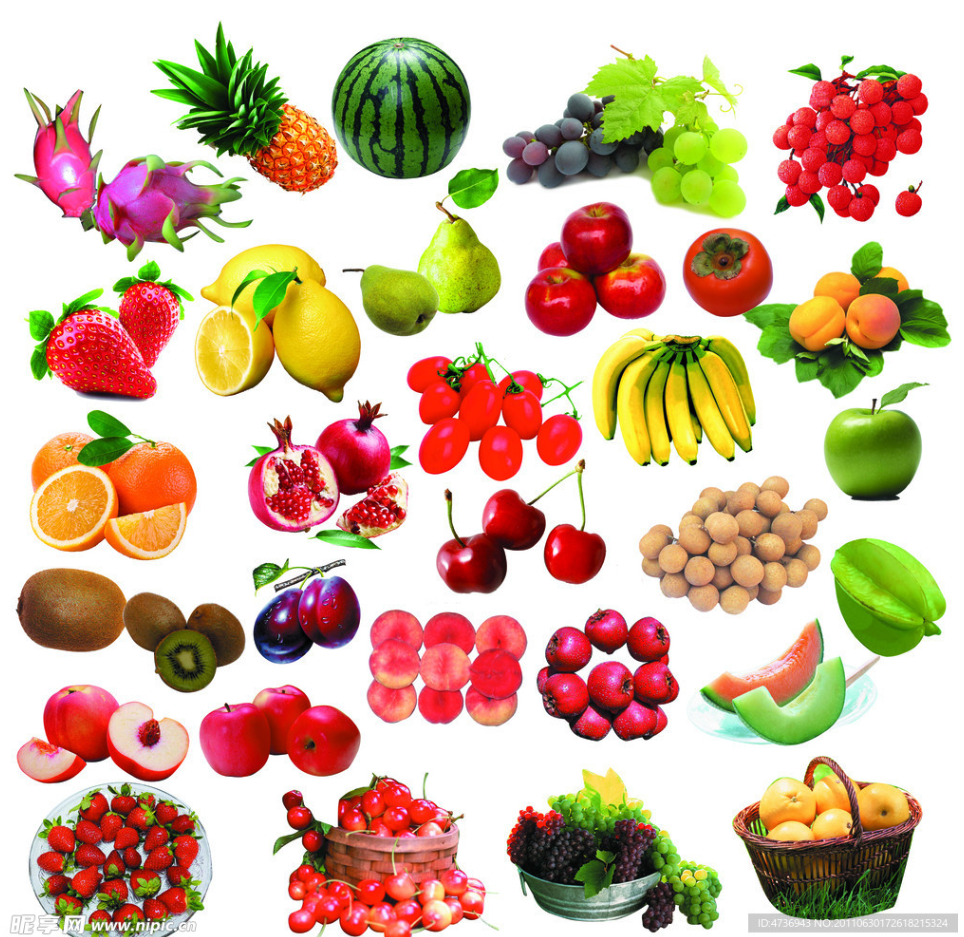

In [25]:
import os
from PIL import Image

img = Image.open(os.path.join('.', 'data', 'fruits.png'))
img.show()

In [26]:
obj_detector

In [27]:
from transformers.pipelines.zero_shot_object_detection import ZeroShotObjectDetectionPipeline # <-- Ctrl + Click here, see source code

In [28]:
predictions = obj_detector(img, candidate_labels=["banana", "lemon"])
predictions

[{'score': 0.15179985761642456,
  'label': 'lemon',
  'box': {'xmin': 267, 'ymin': 277, 'xmax': 361, 'ymax': 394}},
 {'score': 0.1145920678973198,
  'label': 'banana',
  'box': {'xmin': 596, 'ymin': 324, 'xmax': 761, 'ymax': 466}}]

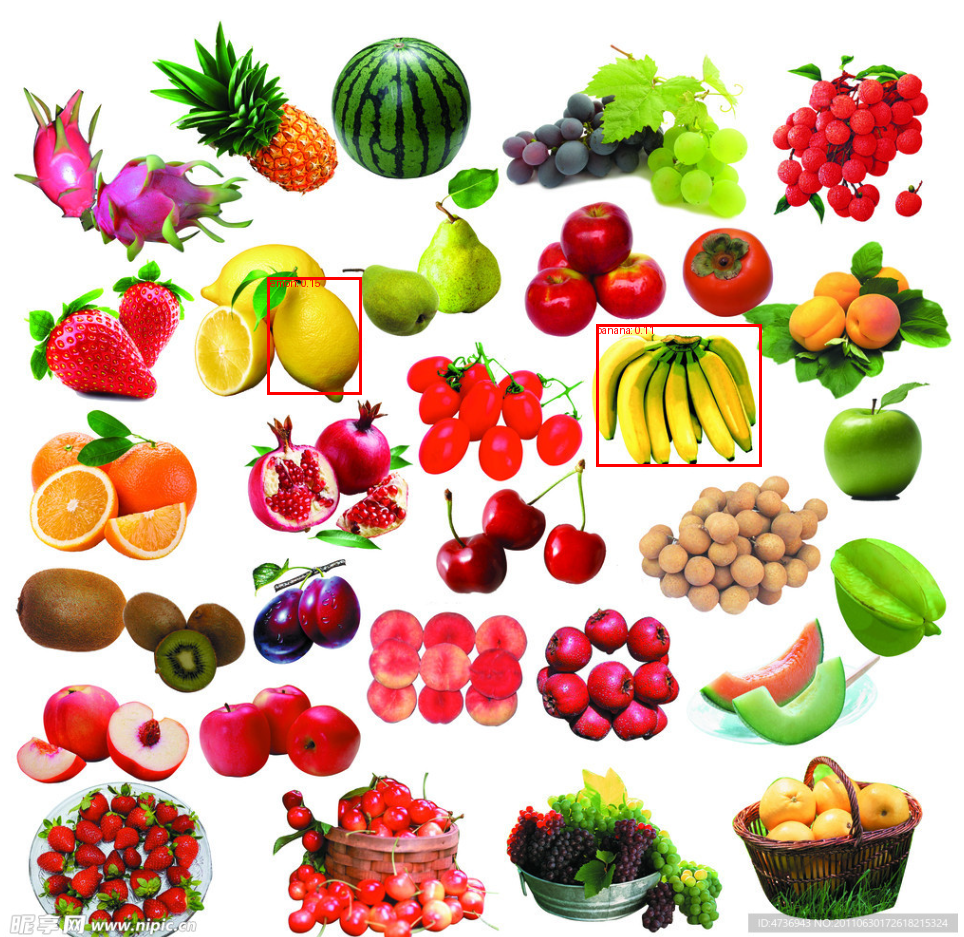

In [29]:
from PIL import ImageDraw

draw = ImageDraw.Draw(img)

for predictions in predictions:
    box = predictions['box']
    label = predictions['label']
    score = predictions['score']
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=3)
    draw.text((xmin, ymin), f"{label}: {score:.2f}", fill='red')

img

# Pipeline's implementation

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [31]:
tokenizer = AutoTokenizer.from_pretrained('Johnson8187/Chinese-Emotion')
model = AutoModelForSequenceClassification.from_pretrained('Johnson8187/Chinese-Emotion')

In [32]:
input_text = "真不错"
inputs = tokenizer(input_text, return_tensors='pt')
inputs

{'input_ids': tensor([[    0,     6,  5364, 68272,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [33]:
res = model(**inputs)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.8377, -0.6890,  2.6626, -2.3612, -1.6787, -0.3538,  0.3318, -1.1177]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [34]:
logits = res.logits
logits = torch.softmax(logits, dim=-1)
logits

tensor([[0.7258, 0.0078, 0.2241, 0.0015, 0.0029, 0.0110, 0.0218, 0.0051]],
       grad_fn=<SoftmaxBackward0>)

In [35]:
pred = torch.argmax(logits, dim=-1).item()
pred

0

In [36]:
model.config.id2label

{0: 'LABEL_0',
 1: 'LABEL_1',
 2: 'LABEL_2',
 3: 'LABEL_3',
 4: 'LABEL_4',
 5: 'LABEL_5',
 6: 'LABEL_6',
 7: 'LABEL_7'}

In [37]:
result = model.config.id2label.get(pred)
result

'LABEL_0'